In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import optimizers

Using TensorFlow backend.


In [2]:
X = np.load("../input/Sign-language-digits-dataset/X.npy")
Y = np.load("../input/Sign-language-digits-dataset/Y.npy")

In [3]:
X.shape

(2062, 64, 64)

In [4]:
Y.shape

(2062, 10)

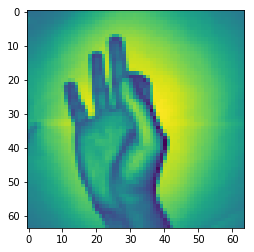

In [5]:
plt.imshow(X[0])

In [6]:
print(Y[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=8)
Xtrain = Xtrain[:,:,:,np.newaxis]
Xtest = Xtest[:,:,:,np.newaxis]

In [8]:
model = Sequential()
model.add(Conv2D(input_shape=(64, 64, 1), filters=64, kernel_size=(4,4)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=4))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adadelta(),
             metrics=['accuracy'])
model.fit(Xtrain, Ytrain, batch_size=32, epochs=10)
score = model.evaluate(Xtest, Ytest)

Epoch 1/10
1649/1649 [==============================] - 8s 5ms/step - loss: 1.1660 - acc: 0.5985
Epoch 2/10
1649/1649 [==============================] - 7s 4ms/step - loss: 0.5046 - acc: 0.8448
Epoch 3/10
1649/1649 [==============================] - 7s 4ms/step - loss: 0.3408 - acc: 0.8945
Epoch 4/10
1649/1649 [==============================] - 7s 4ms/step - loss: 0.2412 - acc: 0.9260
Epoch 5/10
1649/1649 [==============================] - 7s 4ms/step - loss: 0.1993 - acc: 0.9381
Epoch 6/10
1649/1649 [==============================] - 6s 4ms/step - loss: 0.1555 - acc: 0.9491
Epoch 7/10
1649/1649 [==============================] - 6s 4ms/step - loss: 0.1150 - acc: 0.9673
Epoch 8/10
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0789 - acc: 0.9830
Epoch 9/10
1649/1649 [==============================] - 6s 4ms/step - loss: 0.0775 - acc: 0.9794
Epoch 10/10
413/413 [==============================] - 0s 1ms/step


In [10]:
print("Loss is {0:.2f}\nAccuracy is {1:.2f}%".format(score[0], score[1]*100))

Loss is 0.38
Accuracy is 89.59%
